<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%204%3A%20Time%20Series%20Analysis/4_4_Multi_Frequency_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**
## Multi Frequency Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem Statement

Forecasting electricity demand is crucial for electrical companies and decision makers to plan their strategies. In this dataset hourly energy consumption data is used to forecast future demand

In [ ]:
#df = pd.read_csv("/content/AEP_hourly.csv")
url = "https://drive.google.com/file/d/1Q1diIAiC_G1GJ92T6skWdx2ZF8DFc9f_/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


We are going to apply TBATS and Prophet by Facebook methods to apply multifrequency models. We are going to assume there is a daily and weekly seasonality. 

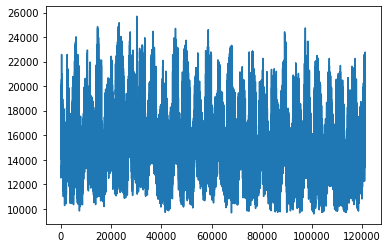

In [ ]:
consumption = df["AEP_MW"]
consumption.plot()


We want to use last 3 months as training and next 24 hours as testing data.

In [ ]:
consumption_train = consumption[-90*24:-24]
consumption_test = consumption[-24:]

First lets install TBATS pacakage

In [ ]:
!pip install tbats

     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 1.4 MB 9.7 MB/s 
     |████████████████████████████████| 9.8 MB 21.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


First install TBATS package

In [ ]:
from tbats import TBATS
# daily and weekly seasonal periods are used
mdl = TBATS(seasonal_periods=[24, 7*24],use_arma_errors=False,use_box_cox=False)
mdl = mdl.fit(consumption_train)

MSE Score: 2751417.483349348


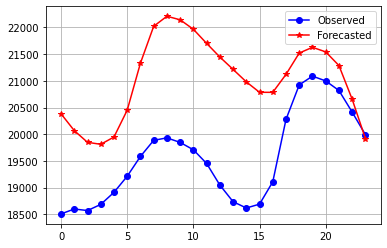

In [ ]:
from sklearn.metrics import mean_squared_error
ypred  = mdl.forecast(24)

plt.plot(consumption_test.values, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("MSE Score:", mean_squared_error(consumption_test, ypred))

Prophet package from facebook automatically detects daily, weekly and yearly data from date-time column. In order to work with prophet package we need to construct a dataframe where a column named `ds` should include the date-time information and a column named `y` should include time series values as follows

In [ ]:
df_new = df.rename(columns = {"Datetime":"ds", "AEP_MW":"y"})
df_new.head()

,ds,y
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


Split the data into training and testing set

In [ ]:
df_train = df_new.iloc[-90*24:-24,:]
df_test = df_new.iloc[-24:,:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


MSE Score: 8377947.723017844


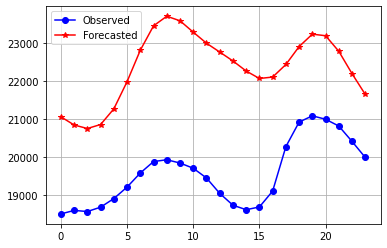

In [ ]:
from fbprophet import Prophet

mdl = Prophet()
mdl.fit(df_train)

df_ypred = mdl.predict(df_test)
ypred = df_ypred.yhat.values

plt.plot(consumption_test.values, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("MSE Score:", mean_squared_error(consumption_test, ypred))